<a href="https://colab.research.google.com/github/ArunPzd/selenium-test/blob/master/Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
#We need to check the working directory before importing files , if its not the same directory we need to use setscd() to change directory
os.getcwd()

'/content'

**a. Import the datasets into the Python environment**

In [ ]:
# @title
items=pd.read_csv('items.csv')
resturants=pd.read_csv('resturants.csv')
sales=pd.read_csv('sales.csv')

**b. Examine the dataset's shape and structure, and look out for any outlier**

In [ ]:
items.head()


id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09
2   3         1                  Sweet Fruity Cake   931  29.22
3   4         1    Amazing Steak Dinner with Rolls   763  26.42
4   5         5                          Milk Cake   583   6.07

In [ ]:
resturants.head()


id            name
0   1     Bob's Diner
1   2  Beachfront Bar
2   3     Sweet Shack
3   4        Fou Cher
4   5     Corner Cafe

In [ ]:
sales.head()

date  item_id  price  item_count
0  2019-01-01        3  29.22         2.0
1  2019-01-01        4  26.42        22.0
2  2019-01-01       12   4.87         7.0
3  2019-01-01       13   4.18        12.0
4  2019-01-01       16   3.21       136.0

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB


In [ ]:
#In sales dataframe date is an object type that means its a character therefore we need to change it to date type
sales['date']=pd.to_datetime(sales['date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        109600 non-null  datetime64[ns]
 1   item_id     109600 non-null  int64         
 2   price       109600 non-null  float64       
 3   item_count  109600 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.3 MB


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   store_id  100 non-null    int64  
 2   name      100 non-null    object 
 3   kcal      100 non-null    int64  
 4   cost      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


In [ ]:
resturants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   name    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


\

c. Merge the datasets into a single dataset that includes the date, item id, price, item count, item
names, kcal values, store id, and store name

In [ ]:
#First we will merge data of all 3 tables and then will do describe function to see outliers
#merge items and sales with id from items and item_id from sales
merge_data=pd.merge(sales,items,left_on='item_id',right_on='id',how='left')


In [ ]:
merge_data

date  item_id  price  item_count   id  store_id  \
0      2019-01-01        3  29.22         2.0    3         1   
1      2019-01-01        4  26.42        22.0    4         1   
2      2019-01-01       12   4.87         7.0   12         1   
3      2019-01-01       13   4.18        12.0   13         1   
4      2019-01-01       16   3.21       136.0   16         1   
...           ...      ...    ...         ...  ...       ...   
109595 2021-12-31       96  21.93         0.0   96         5   
109596 2021-12-31       97  28.65         0.0   97         4   
109597 2021-12-31       98   5.00         0.0   98         2   
109598 2021-12-31       99   5.32         0.0   99         4   
109599 2021-12-31      100   2.48         0.0  100         2   

                                                     name  kcal   cost  
0                                       Sweet Fruity Cake   931  29.22  
1                         Amazing Steak Dinner with Rolls   763  26.42  
2                                    Fantastic Sweet Cola   478   4.87  
3                                 Sweet Frozen Soft Drink   490   4.18  
4                                    Frozen Milky Smoothy   284   3.21  
...                                                   ...   ...    ...  
109595                  Blue Ribbon Fish with Bread Lunch   708  21.93  
109596  Original Fruity Cod with Bread and Vegetables ...   744  28.65  
109597                    Original Sweet Milky Soft Drink   579   5.00  
109598                           Frozen Tomato Soft Drink   423   5.32  
109599                             Awesome Vodka Cocktail   223   2.48  

[109600 rows x 9 columns]

In [ ]:
#merge the resturant data with merge_data
merged_data=pd.merge(merge_data,resturants,left_on='store_id',right_on='id',how='left')

In [ ]:
merged_data

date  item_id  price  item_count  id_x  store_id  \
0      2019-01-01        3  29.22         2.0     3         1   
1      2019-01-01        4  26.42        22.0     4         1   
2      2019-01-01       12   4.87         7.0    12         1   
3      2019-01-01       13   4.18        12.0    13         1   
4      2019-01-01       16   3.21       136.0    16         1   
...           ...      ...    ...         ...   ...       ...   
109595 2021-12-31       96  21.93         0.0    96         5   
109596 2021-12-31       97  28.65         0.0    97         4   
109597 2021-12-31       98   5.00         0.0    98         2   
109598 2021-12-31       99   5.32         0.0    99         4   
109599 2021-12-31      100   2.48         0.0   100         2   

                                                   name_x  kcal   cost  id_y  \
0                                       Sweet Fruity Cake   931  29.22     1   
1                         Amazing Steak Dinner with Rolls   763  26.42     1   
2                                    Fantastic Sweet Cola   478   4.87     1   
3                                 Sweet Frozen Soft Drink   490   4.18     1   
4                                    Frozen Milky Smoothy   284   3.21     1   
...                                                   ...   ...    ...   ...   
109595                  Blue Ribbon Fish with Bread Lunch   708  21.93     5   
109596  Original Fruity Cod with Bread and Vegetables ...   744  28.65     4   
109597                    Original Sweet Milky Soft Drink   579   5.00     2   
109598                           Frozen Tomato Soft Drink   423   5.32     4   
109599                             Awesome Vodka Cocktail   223   2.48     2   

                name_y  
0          Bob's Diner  
1          Bob's Diner  
2          Bob's Diner  
3          Bob's Diner  
4          Bob's Diner  
...                ...  
109595     Corner Cafe  
109596        Fou Cher  
109597  Beachfront Bar  
109598        Fou Cher  
109599  Beachfront Bar  

[109600 rows x 11 columns]

In [ ]:
(merged_data['item_id']==merged_data['id_x']).all()

np.True_

In [ ]:
(merged_data['id_y']==merged_data['store_id']).all()

np.True_

In [ ]:
(merged_data['price']==merged_data['cost']).all()

np.True_

In [ ]:
#we can drop id_x and id_y and cost
merged_data.drop(['id_x','id_y','cost'],axis=1,inplace=True)

In [ ]:
merged_data.columns

Index(['date', 'item_id', 'price', 'item_count', 'store_id', 'name_x', 'kcal',
       'name_y'],
      dtype='object')

In [ ]:
#rename the columns
merged_data.rename({'name_x':'item_name','name_y':'restaurant_name'},axis=1,inplace=True)

In [ ]:
merged_data.columns

Index(['date', 'item_id', 'price', 'item_count', 'store_id', 'item_name',
       'kcal', 'restaurant_name'],
      dtype='object')

**Examine the overall date wise sales to understand the pattern**

In [ ]:
grpd_dt = merged_data.groupby('date')['item_count'].sum()

In [ ]:
grpd_dt

date
2019-01-01    427.0
2019-01-02    337.0
2019-01-03    445.0
2019-01-04    564.0
2019-01-05    552.0
              ...  
2021-12-27    192.0
2021-12-28    344.0
2021-12-29    371.0
2021-12-30    527.0
2021-12-31    817.0
Name: item_count, Length: 1096, dtype: float64

In [ ]:
import matplotlib.pyplot as plt


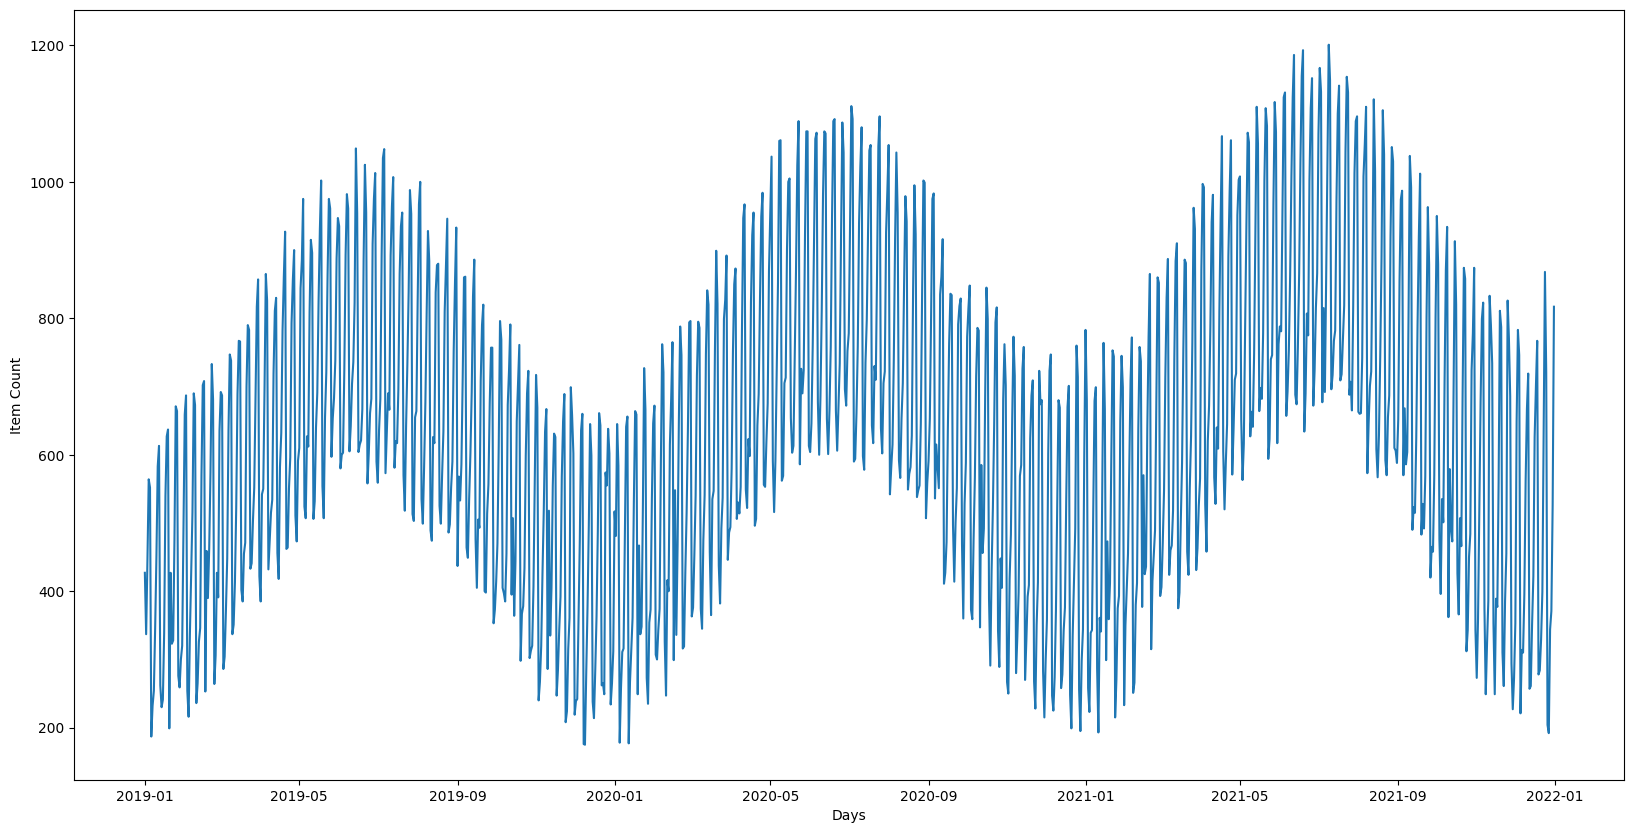

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('Days')
plt.ylabel('Item Count')
plt.plot(grpd_dt)


**Find out how sales fluctuate across different days of the week**

In [ ]:
merged_data['weekday']=merged_data['date'].dt.day_name()

In [ ]:
merged_data

date  item_id  price  item_count  store_id  \
0      2019-01-01        3  29.22         2.0         1   
1      2019-01-01        4  26.42        22.0         1   
2      2019-01-01       12   4.87         7.0         1   
3      2019-01-01       13   4.18        12.0         1   
4      2019-01-01       16   3.21       136.0         1   
...           ...      ...    ...         ...       ...   
109595 2021-12-31       96  21.93         0.0         5   
109596 2021-12-31       97  28.65         0.0         4   
109597 2021-12-31       98   5.00         0.0         2   
109598 2021-12-31       99   5.32         0.0         4   
109599 2021-12-31      100   2.48         0.0         2   

                                                item_name  kcal  \
0                                       Sweet Fruity Cake   931   
1                         Amazing Steak Dinner with Rolls   763   
2                                    Fantastic Sweet Cola   478   
3                                 Sweet Frozen Soft Drink   490   
4                                    Frozen Milky Smoothy   284   
...                                                   ...   ...   
109595                  Blue Ribbon Fish with Bread Lunch   708   
109596  Original Fruity Cod with Bread and Vegetables ...   744   
109597                    Original Sweet Milky Soft Drink   579   
109598                           Frozen Tomato Soft Drink   423   
109599                             Awesome Vodka Cocktail   223   

       restaurant_name  weekday  
0          Bob's Diner  Tuesday  
1          Bob's Diner  Tuesday  
2          Bob's Diner  Tuesday  
3          Bob's Diner  Tuesday  
4          Bob's Diner  Tuesday  
...                ...      ...  
109595     Corner Cafe   Friday  
109596        Fou Cher   Friday  
109597  Beachfront Bar   Friday  
109598        Fou Cher   Friday  
109599  Beachfront Bar   Friday  

[109600 rows x 9 columns]

In [ ]:
grpd_weekend=merged_data.groupby('weekday')['item_count'].sum()

In [ ]:
grpd_weekend

weekday
Friday       136300.0
Monday        70112.0
Saturday     135644.0
Sunday        68032.0
Thursday     116947.0
Tuesday       79454.0
Wednesday     88298.0
Name: item_count, dtype: float64

In [ ]:
import calendar
day_names=list(calendar.day_name)
day_names

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
grpd=grpd_weekend.loc[day_names].squeeze()
grpd

weekday
Monday        70112.0
Tuesday       79454.0
Wednesday     88298.0
Thursday     116947.0
Friday       136300.0
Saturday     135644.0
Sunday        68032.0
Name: item_count, dtype: float64

<BarContainer object of 7 artists>

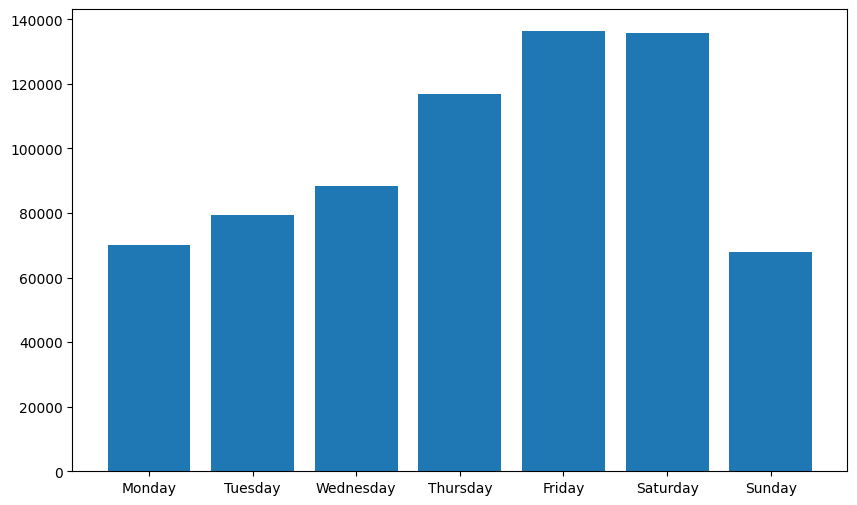

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=grpd.index,height=grpd.values)

**Look for any noticeable trends in the sales data for different months of the year**

In [ ]:
merged_data['month']=merged_data['date'].dt.month_name()
merged_data

date  item_id  price  item_count  store_id  \
0      2019-01-01        3  29.22         2.0         1   
1      2019-01-01        4  26.42        22.0         1   
2      2019-01-01       12   4.87         7.0         1   
3      2019-01-01       13   4.18        12.0         1   
4      2019-01-01       16   3.21       136.0         1   
...           ...      ...    ...         ...       ...   
109595 2021-12-31       96  21.93         0.0         5   
109596 2021-12-31       97  28.65         0.0         4   
109597 2021-12-31       98   5.00         0.0         2   
109598 2021-12-31       99   5.32         0.0         4   
109599 2021-12-31      100   2.48         0.0         2   

                                                item_name  kcal  \
0                                       Sweet Fruity Cake   931   
1                         Amazing Steak Dinner with Rolls   763   
2                                    Fantastic Sweet Cola   478   
3                                 Sweet Frozen Soft Drink   490   
4                                    Frozen Milky Smoothy   284   
...                                                   ...   ...   
109595                  Blue Ribbon Fish with Bread Lunch   708   
109596  Original Fruity Cod with Bread and Vegetables ...   744   
109597                    Original Sweet Milky Soft Drink   579   
109598                           Frozen Tomato Soft Drink   423   
109599                             Awesome Vodka Cocktail   223   

       restaurant_name  weekday     month  
0          Bob's Diner  Tuesday   January  
1          Bob's Diner  Tuesday   January  
2          Bob's Diner  Tuesday   January  
3          Bob's Diner  Tuesday   January  
4          Bob's Diner  Tuesday   January  
...                ...      ...       ...  
109595     Corner Cafe   Friday  December  
109596        Fou Cher   Friday  December  
109597  Beachfront Bar   Friday  December  
109598        Fou Cher   Friday  December  
109599  Beachfront Bar   Friday  December  

[109600 rows x 10 columns]

In [ ]:
grpd_month=merged_data.groupby('month')['item_count'].sum()
grpd_month

month
April        63145.0
August       69502.0
December     41224.0
February     43596.0
January      41270.0
July         77125.0
June         74423.0
March        55137.0
May          73632.0
November     43670.0
October      53403.0
September    58660.0
Name: item_count, dtype: float64

In [ ]:
month_names=list(calendar.month_name)
month_name=month_names[1:]

In [ ]:
grpd_m=grpd_month.loc[month_name].squeeze()
grpd_m

month
January      41270.0
February     43596.0
March        55137.0
April        63145.0
May          73632.0
June         74423.0
July         77125.0
August       69502.0
September    58660.0
October      53403.0
November     43670.0
December     41224.0
Name: item_count, dtype: float64

<BarContainer object of 12 artists>

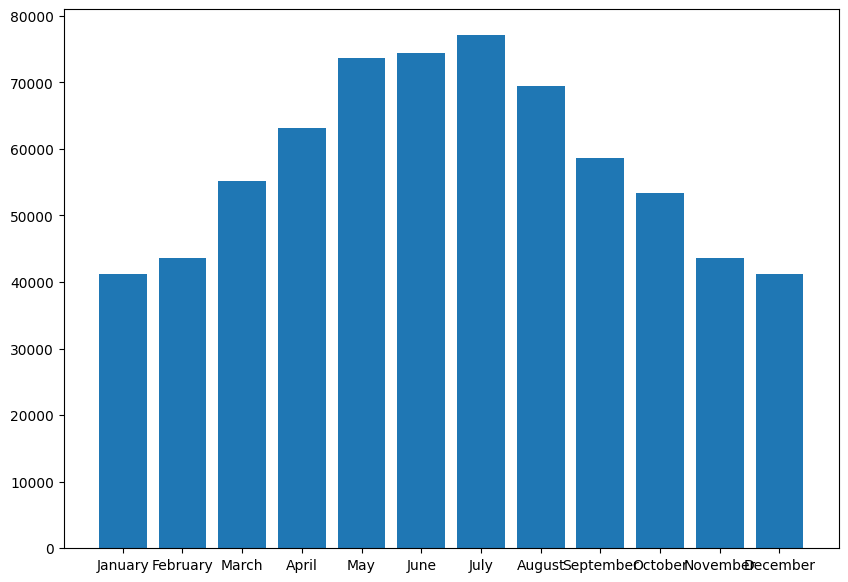

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(x=grpd_m.index,height=grpd_m.values)

Examine the sales distribution across different quarters averaged over the years. Identify any
noticeable patterns

In [ ]:
merged_data['quarter']=merged_data['date'].dt.quarter
merged_data

date  item_id  price  item_count  store_id  \
0      2019-01-01        3  29.22         2.0         1   
1      2019-01-01        4  26.42        22.0         1   
2      2019-01-01       12   4.87         7.0         1   
3      2019-01-01       13   4.18        12.0         1   
4      2019-01-01       16   3.21       136.0         1   
...           ...      ...    ...         ...       ...   
109595 2021-12-31       96  21.93         0.0         5   
109596 2021-12-31       97  28.65         0.0         4   
109597 2021-12-31       98   5.00         0.0         2   
109598 2021-12-31       99   5.32         0.0         4   
109599 2021-12-31      100   2.48         0.0         2   

                                                item_name  kcal  \
0                                       Sweet Fruity Cake   931   
1                         Amazing Steak Dinner with Rolls   763   
2                                    Fantastic Sweet Cola   478   
3                                 Sweet Frozen Soft Drink   490   
4                                    Frozen Milky Smoothy   284   
...                                                   ...   ...   
109595                  Blue Ribbon Fish with Bread Lunch   708   
109596  Original Fruity Cod with Bread and Vegetables ...   744   
109597                    Original Sweet Milky Soft Drink   579   
109598                           Frozen Tomato Soft Drink   423   
109599                             Awesome Vodka Cocktail   223   

       restaurant_name  weekday     month  quarter  
0          Bob's Diner  Tuesday   January        1  
1          Bob's Diner  Tuesday   January        1  
2          Bob's Diner  Tuesday   January        1  
3          Bob's Diner  Tuesday   January        1  
4          Bob's Diner  Tuesday   January        1  
...                ...      ...       ...      ...  
109595     Corner Cafe   Friday  December        4  
109596        Fou Cher   Friday  December        4  
109597  Beachfront Bar   Friday  December        4  
109598        Fou Cher   Friday  December        4  
109599  Beachfront Bar   Friday  December        4  

[109600 rows x 11 columns]

In [ ]:
grpd_quarter=merged_data.groupby('quarter')['item_count'].sum()
grpd_quarter

quarter
1    140003.0
2    211200.0
3    205287.0
4    138297.0
Name: item_count, dtype: float64

([<matplotlib.axis.XTick at 0x799e0b369890>,
 [Text(1, 0, 'Q1'), Text(2, 0, 'Q2'), Text(3, 0, 'Q3'), Text(4, 0, 'Q4')])

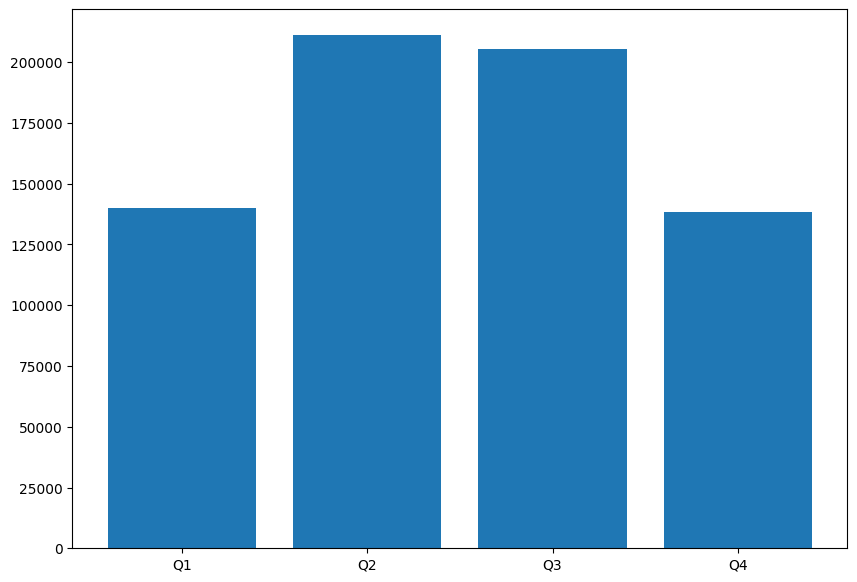

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(x=grpd_quarter.index,height=grpd_quarter.values)
plt.xticks(range(1,5),['Q'+ str(i) for i in range (1,5)])

In [ ]:
merged_data['year']=merged_data['date'].dt.year
merged_data

date  item_id  price  item_count  store_id  \
0      2019-01-01        3  29.22         2.0         1   
1      2019-01-01        4  26.42        22.0         1   
2      2019-01-01       12   4.87         7.0         1   
3      2019-01-01       13   4.18        12.0         1   
4      2019-01-01       16   3.21       136.0         1   
...           ...      ...    ...         ...       ...   
109595 2021-12-31       96  21.93         0.0         5   
109596 2021-12-31       97  28.65         0.0         4   
109597 2021-12-31       98   5.00         0.0         2   
109598 2021-12-31       99   5.32         0.0         4   
109599 2021-12-31      100   2.48         0.0         2   

                                                item_name  kcal  \
0                                       Sweet Fruity Cake   931   
1                         Amazing Steak Dinner with Rolls   763   
2                                    Fantastic Sweet Cola   478   
3                                 Sweet Frozen Soft Drink   490   
4                                    Frozen Milky Smoothy   284   
...                                                   ...   ...   
109595                  Blue Ribbon Fish with Bread Lunch   708   
109596  Original Fruity Cod with Bread and Vegetables ...   744   
109597                    Original Sweet Milky Soft Drink   579   
109598                           Frozen Tomato Soft Drink   423   
109599                             Awesome Vodka Cocktail   223   

       restaurant_name  weekday     month  quarter  year  
0          Bob's Diner  Tuesday   January        1  2019  
1          Bob's Diner  Tuesday   January        1  2019  
2          Bob's Diner  Tuesday   January        1  2019  
3          Bob's Diner  Tuesday   January        1  2019  
4          Bob's Diner  Tuesday   January        1  2019  
...                ...      ...       ...      ...   ...  
109595     Corner Cafe   Friday  December        4  2021  
109596        Fou Cher   Friday  December        4  2021  
109597  Beachfront Bar   Friday  December        4  2021  
109598        Fou Cher   Friday  December        4  2021  
109599  Beachfront Bar   Friday  December        4  2021  

[109600 rows x 12 columns]

In [ ]:
#create a avriable as quarter-year
merged_data['quarter_year']='Q' + merged_data['quarter'].astype(str) + '-' + merged_data['year'].astype(str)
merged_data

date  item_id  price  item_count  store_id  \
0      2019-01-01        3  29.22         2.0         1   
1      2019-01-01        4  26.42        22.0         1   
2      2019-01-01       12   4.87         7.0         1   
3      2019-01-01       13   4.18        12.0         1   
4      2019-01-01       16   3.21       136.0         1   
...           ...      ...    ...         ...       ...   
109595 2021-12-31       96  21.93         0.0         5   
109596 2021-12-31       97  28.65         0.0         4   
109597 2021-12-31       98   5.00         0.0         2   
109598 2021-12-31       99   5.32         0.0         4   
109599 2021-12-31      100   2.48         0.0         2   

                                                item_name  kcal  \
0                                       Sweet Fruity Cake   931   
1                         Amazing Steak Dinner with Rolls   763   
2                                    Fantastic Sweet Cola   478   
3                                 Sweet Frozen Soft Drink   490   
4                                    Frozen Milky Smoothy   284   
...                                                   ...   ...   
109595                  Blue Ribbon Fish with Bread Lunch   708   
109596  Original Fruity Cod with Bread and Vegetables ...   744   
109597                    Original Sweet Milky Soft Drink   579   
109598                           Frozen Tomato Soft Drink   423   
109599                             Awesome Vodka Cocktail   223   

       restaurant_name  weekday     month  quarter  year quarter_year  
0          Bob's Diner  Tuesday   January        1  2019      Q1-2019  
1          Bob's Diner  Tuesday   January        1  2019      Q1-2019  
2          Bob's Diner  Tuesday   January        1  2019      Q1-2019  
3          Bob's Diner  Tuesday   January        1  2019      Q1-2019  
4          Bob's Diner  Tuesday   January        1  2019      Q1-2019  
...                ...      ...       ...      ...   ...          ...  
109595     Corner Cafe   Friday  December        4  2021      Q4-2021  
109596        Fou Cher   Friday  December        4  2021      Q4-2021  
109597  Beachfront Bar   Friday  December        4  2021      Q4-2021  
109598        Fou Cher   Friday  December        4  2021      Q4-2021  
109599  Beachfront Bar   Friday  December        4  2021      Q4-2021  

[109600 rows x 13 columns]

In [ ]:
grpd_qyear=merged_data.groupby('quarter_year')['item_count'].sum()
grpd_qyear

quarter_year
Q1-2019    43231.0
Q1-2020    47278.0
Q1-2021    49494.0
Q2-2019    65259.0
Q2-2020    70654.0
Q2-2021    75287.0
Q3-2019    63152.0
Q3-2020    68241.0
Q3-2021    73894.0
Q4-2019    42595.0
Q4-2020    46408.0
Q4-2021    49294.0
Name: item_count, dtype: float64

In [ ]:
order=['Q{}-{}'.format(j,i) for i in range(2019,2022) for j in range(1,5)]
order

['Q1-2019',
 'Q2-2019',
 'Q3-2019',
 'Q4-2019',
 'Q1-2020',
 'Q2-2020',
 'Q3-2020',
 'Q4-2020',
 'Q1-2021',
 'Q2-2021',
 'Q3-2021',
 'Q4-2021']

In [ ]:
grpd_qyear=grpd_qyear.loc[order].squeeze()
grpd_qyear

quarter_year
Q1-2019    43231.0
Q2-2019    65259.0
Q3-2019    63152.0
Q4-2019    42595.0
Q1-2020    47278.0
Q2-2020    70654.0
Q3-2020    68241.0
Q4-2020    46408.0
Q1-2021    49494.0
Q2-2021    75287.0
Q3-2021    73894.0
Q4-2021    49294.0
Name: item_count, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Q1-2019'),
  Text(1, 0, 'Q2-2019'),
  Text(2, 0, 'Q3-2019'),
  Text(3, 0, 'Q4-2019'),
  Text(4, 0, 'Q1-2020'),
  Text(5, 0, 'Q2-2020'),
  Text(6, 0, 'Q3-2020'),
  Text(7, 0, 'Q4-2020'),
  Text(8, 0, 'Q1-2021'),
  Text(9, 0, 'Q2-2021'),
  Text(10, 0, 'Q3-2021'),
  Text(11, 0, 'Q4-2021')])

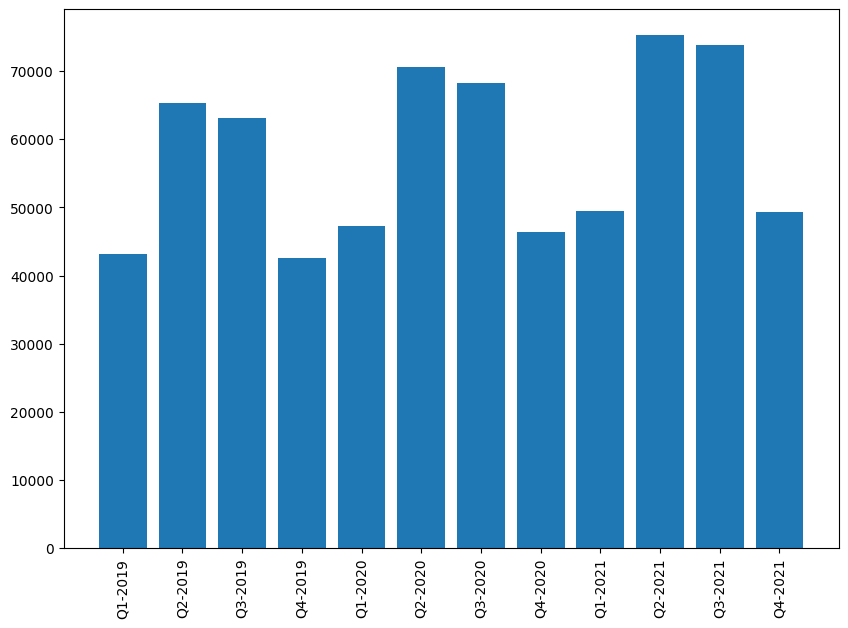

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(x=grpd_qyear.index,height=grpd_qyear.values)
plt.xticks(rotation=90)

Compare the performances of the different restaurants. Find out which restaurant had the most
sales and look at the sales for each restaurant across different years, months, and days.

In [ ]:
grpd_restaurant=merged_data.groupby('restaurant_name')['item_count'].sum()
grpd_restaurant

restaurant_name
Beachfront Bar      1305.0
Bob's Diner       687527.0
Corner Cafe         1310.0
Fou Cher            1106.0
Surfs Up            1803.0
Sweet Shack         1736.0
Name: item_count, dtype: float64

<BarContainer object of 6 artists>

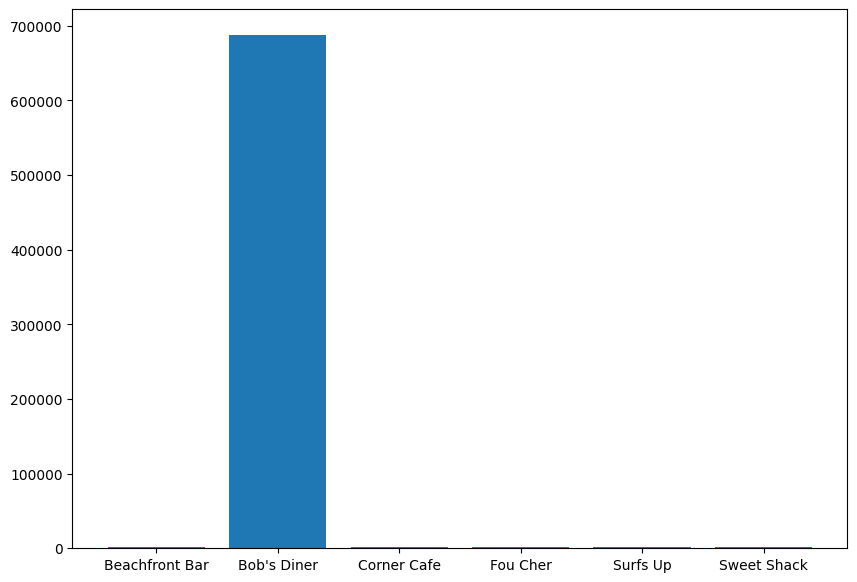

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(x=grpd_restaurant.index,height=grpd_restaurant.values)

**sales for each restaurant across different years, months, and days**

In [ ]:
plot_data=merged_data.pivot_table(index='date',columns='store_id',values='item_count',aggfunc='sum')
plot_data

store_id        1    2    3    4    5    6
date                                      
2019-01-01  421.0  1.0  0.0  1.0  2.0  2.0
2019-01-02  330.0  1.0  1.0  2.0  1.0  2.0
2019-01-03  438.0  1.0  2.0  3.0  0.0  1.0
2019-01-04  559.0  2.0  2.0  1.0  0.0  0.0
2019-01-05  545.0  1.0  2.0  2.0  2.0  0.0
...           ...  ...  ...  ...  ...  ...
2021-12-27  184.0  2.0  2.0  2.0  0.0  2.0
2021-12-28  340.0  1.0  0.0  1.0  0.0  2.0
2021-12-29  366.0  1.0  2.0  0.0  1.0  1.0
2021-12-30  525.0  1.0  0.0  1.0  0.0  0.0
2021-12-31  815.0  1.0  0.0  0.0  0.0  1.0

[1096 rows x 6 columns]

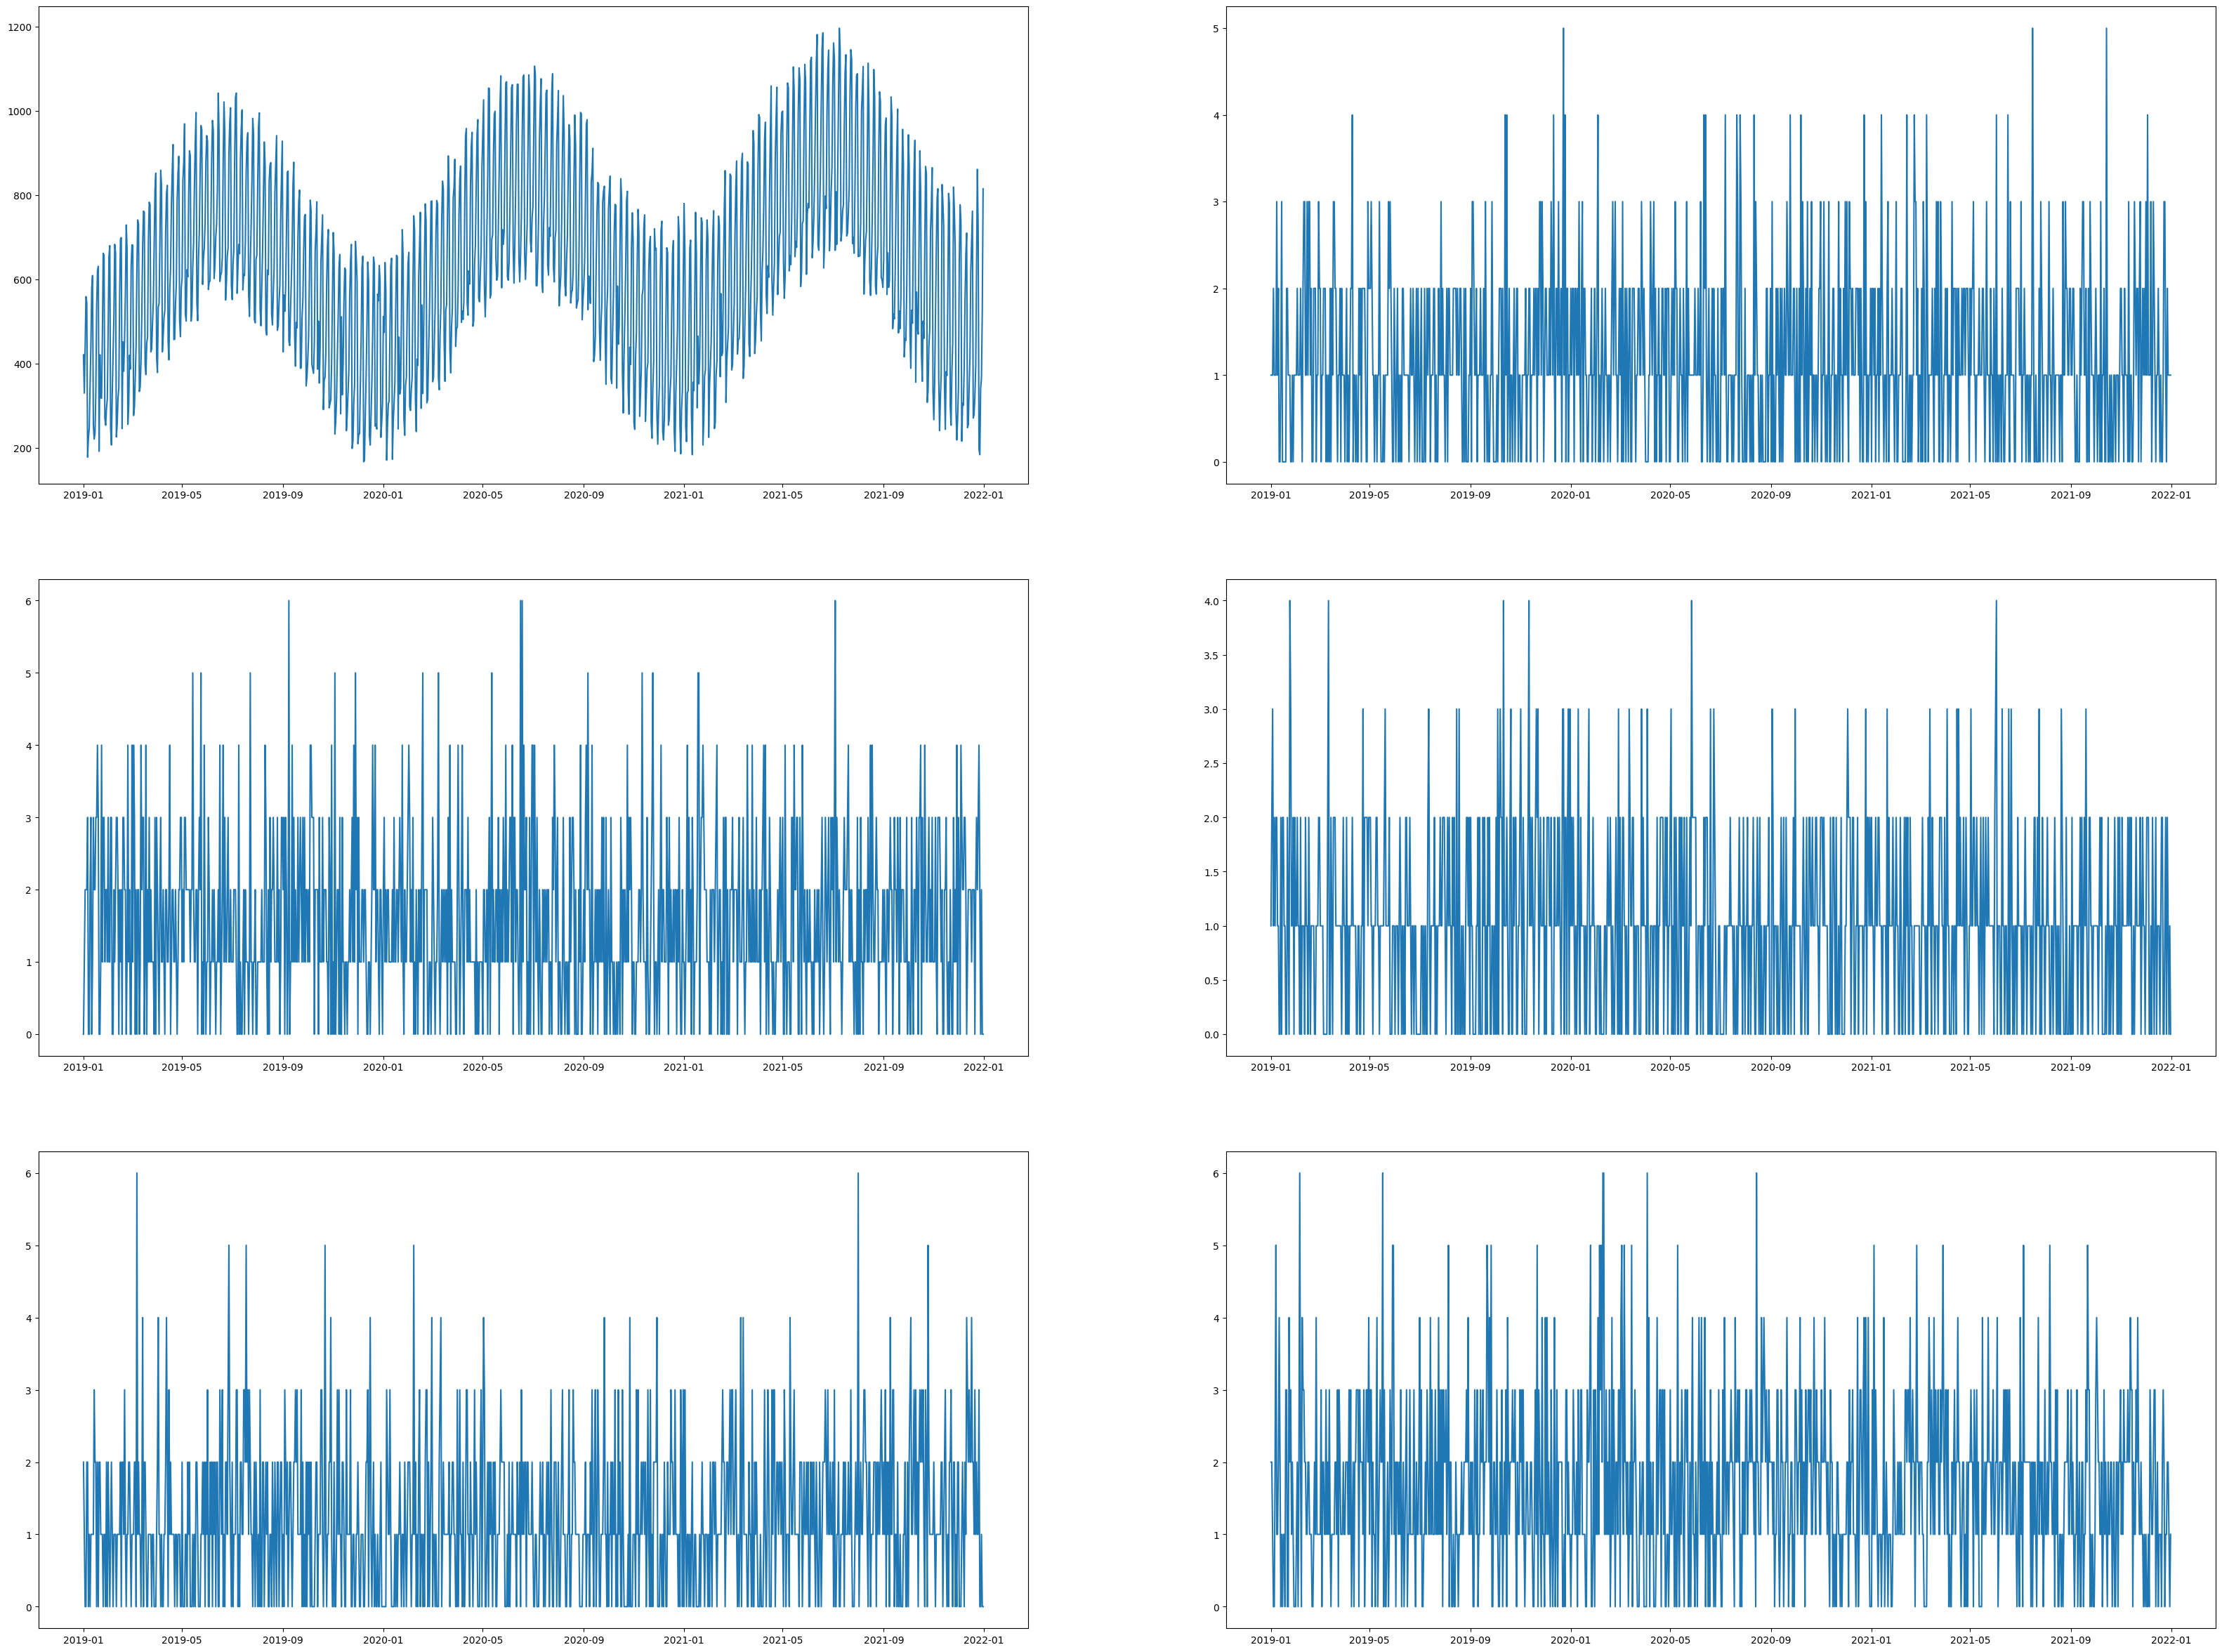

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(40,30))
r,c=0,0
for i in range(1,7):
  ax[r,c].plot(plot_data.loc[:,i])
  c+=1
  if c==2:
    c=0
    r+=1

In [ ]:
merged_data.columns

Index(['date', 'item_id', 'price', 'item_count', 'store_id', 'item_name',
       'kcal', 'restaurant_name', 'weekday', 'month', 'quarter', 'year',
       'quarter_year'],
      dtype='object')

In [ ]:
plot_year=merged_data.pivot_table(index='quarter_year',columns='store_id',values='item_count',aggfunc='sum')
plot_year

store_id            1      2      3      4      5      6
quarter_year                                            
Q1-2019       42631.0  111.0  155.0   99.0   99.0  136.0
Q1-2020       46669.0  115.0  139.0   87.0  101.0  167.0
Q1-2021       48888.0  107.0  152.0   91.0  102.0  154.0
Q2-2019       64662.0  102.0  149.0   88.0  103.0  155.0
Q2-2020       70049.0  105.0  153.0   99.0  111.0  137.0
Q2-2021       74678.0  113.0  134.0   99.0  115.0  148.0
Q3-2019       62546.0  103.0  139.0   84.0  121.0  159.0
Q3-2020       67665.0  102.0  135.0   74.0   98.0  167.0
Q3-2021       73299.0  103.0  153.0   82.0  117.0  140.0
Q4-2019       41960.0  123.0  147.0  121.0  100.0  144.0
Q4-2020       45808.0  115.0  127.0   97.0  105.0  156.0
Q4-2021       48672.0  106.0  153.0   85.0  138.0  140.0

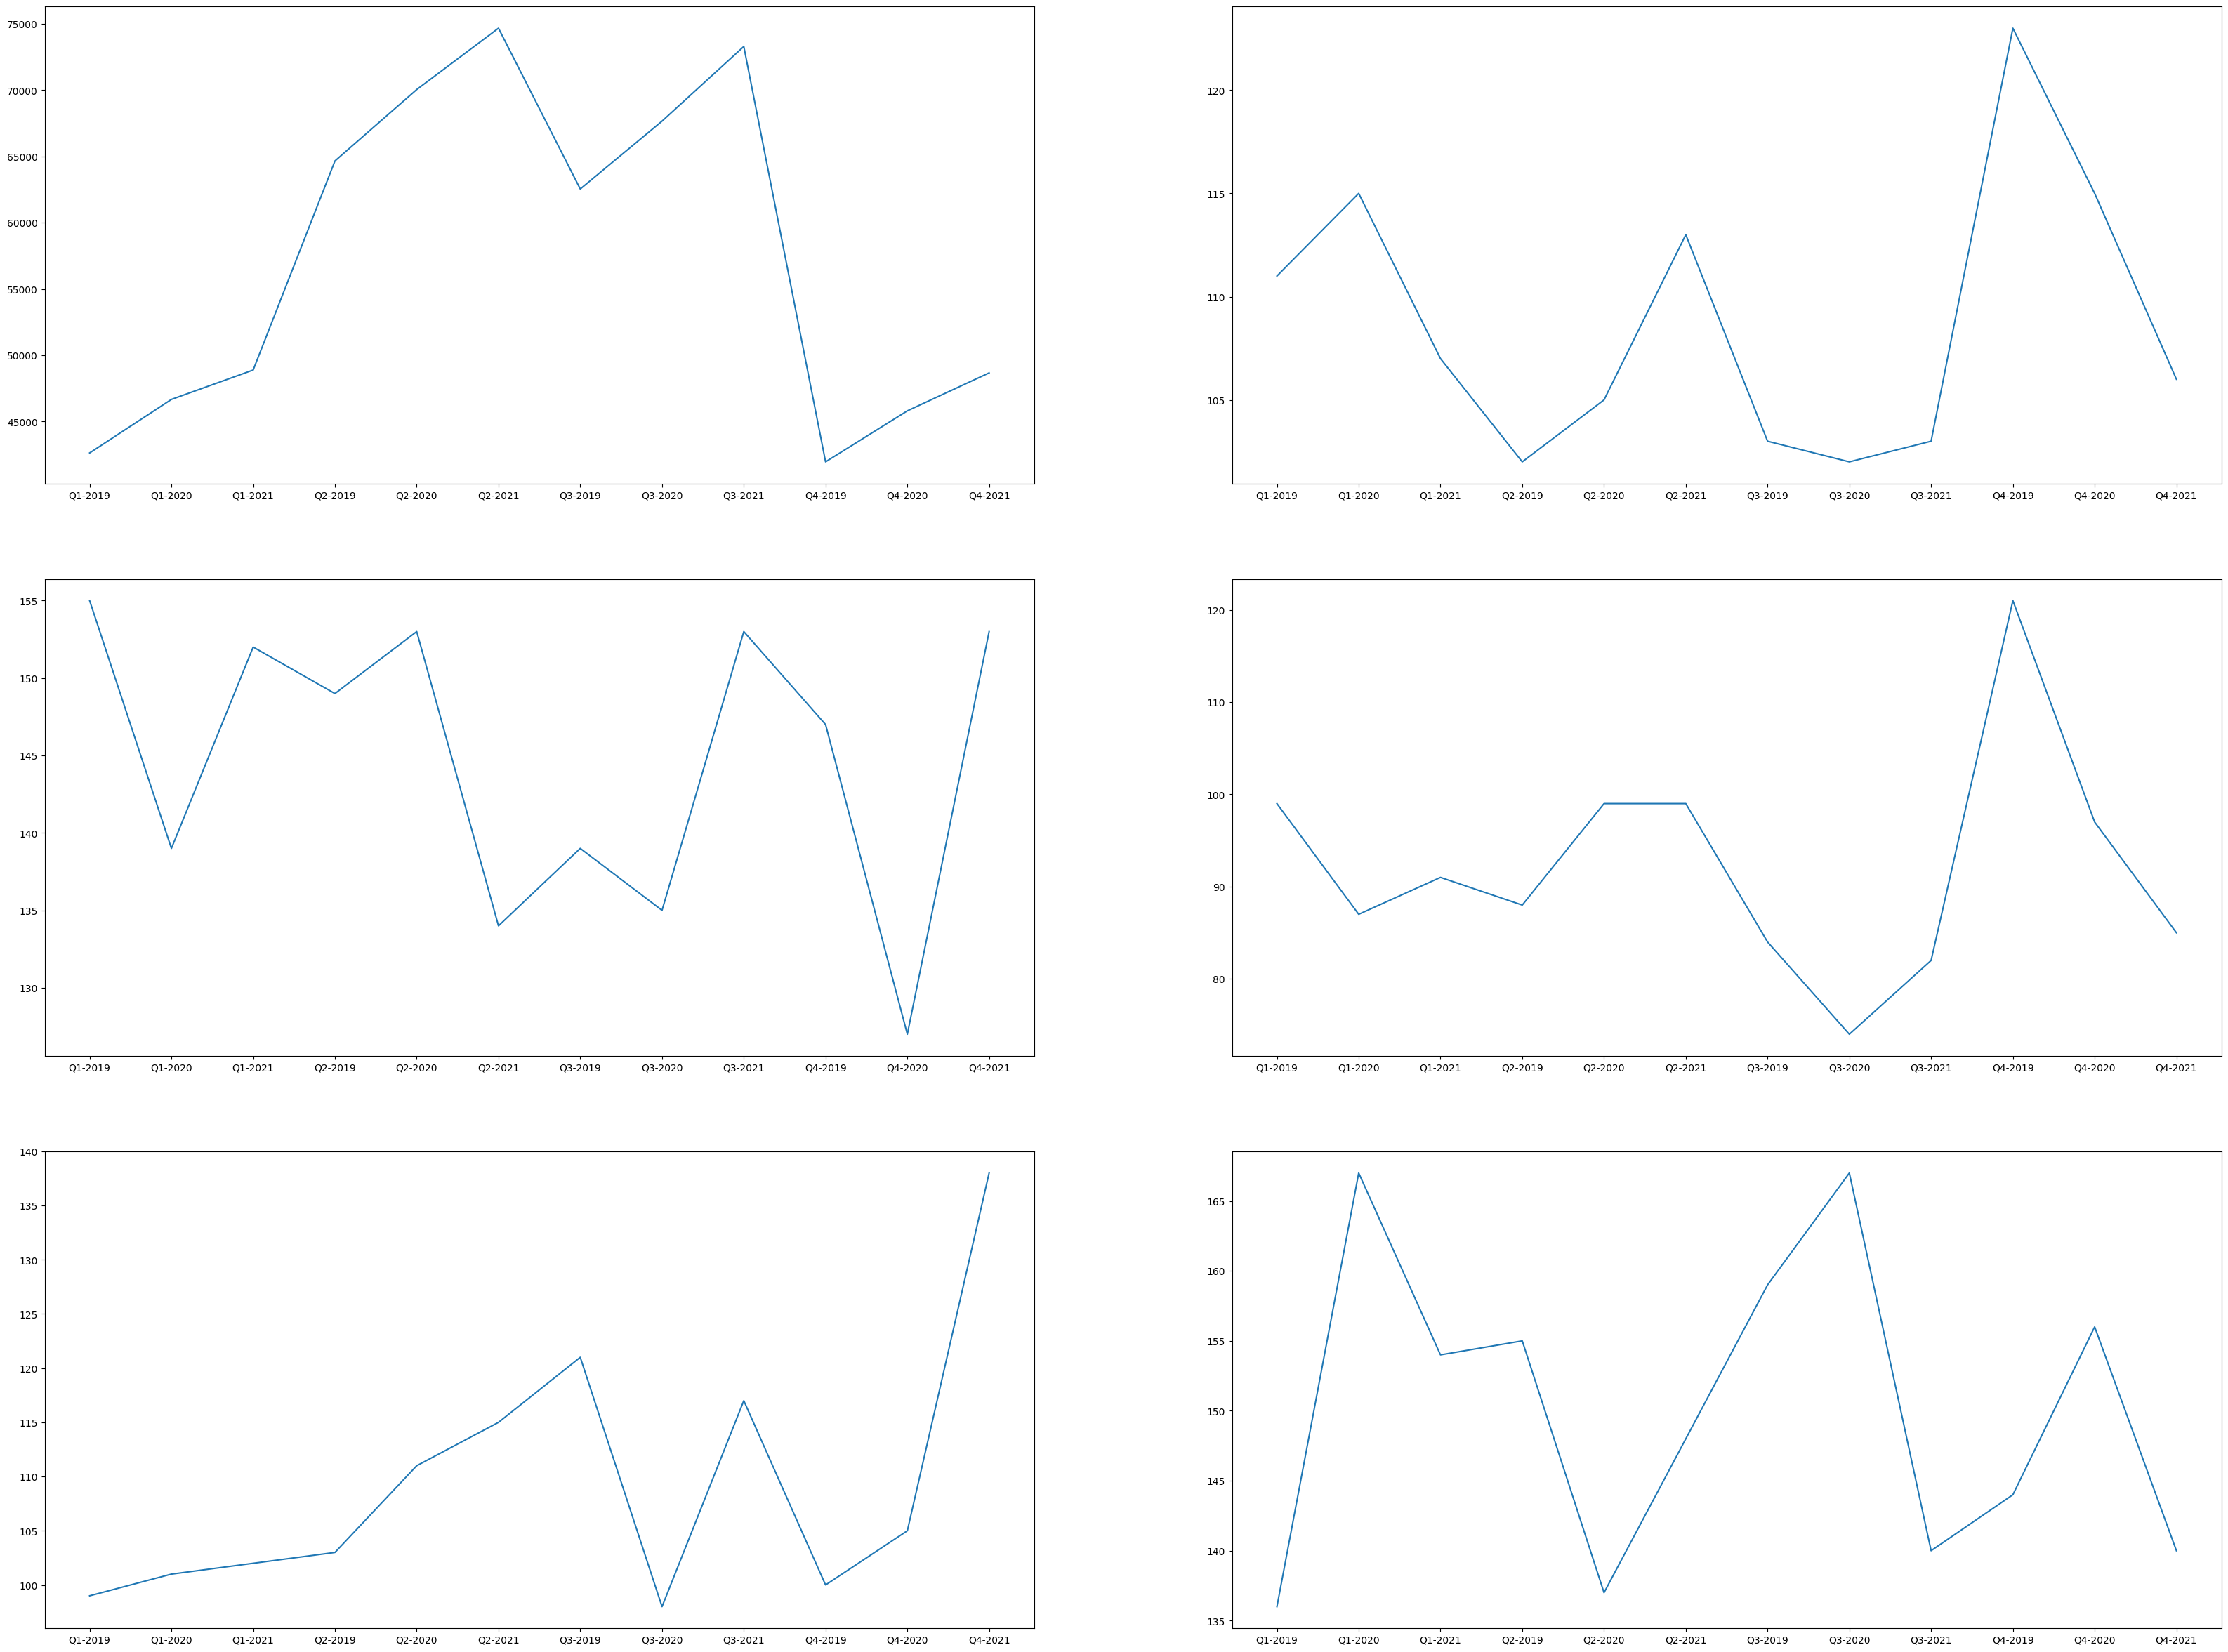

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(40,30))
r,c=0,0
for i in range(1,7):
  ax[r,c].plot(plot_year.loc[:,i])
  c+=1
  if c==2:
    c=0
    r+=1

Identify the most popular items overall and the stores where they are being sold. Also, find
out the most popular item at each store **bold text**

In [ ]:
merged_data

date  item_id  price  item_count  store_id  \
0      2019-01-01        3  29.22         2.0         1   
1      2019-01-01        4  26.42        22.0         1   
2      2019-01-01       12   4.87         7.0         1   
3      2019-01-01       13   4.18        12.0         1   
4      2019-01-01       16   3.21       136.0         1   
...           ...      ...    ...         ...       ...   
109595 2021-12-31       96  21.93         0.0         5   
109596 2021-12-31       97  28.65         0.0         4   
109597 2021-12-31       98   5.00         0.0         2   
109598 2021-12-31       99   5.32         0.0         4   
109599 2021-12-31      100   2.48         0.0         2   

                                                item_name  kcal  \
0                                       Sweet Fruity Cake   931   
1                         Amazing Steak Dinner with Rolls   763   
2                                    Fantastic Sweet Cola   478   
3                                 Sweet Frozen Soft Drink   490   
4                                    Frozen Milky Smoothy   284   
...                                                   ...   ...   
109595                  Blue Ribbon Fish with Bread Lunch   708   
109596  Original Fruity Cod with Bread and Vegetables ...   744   
109597                    Original Sweet Milky Soft Drink   579   
109598                           Frozen Tomato Soft Drink   423   
109599                             Awesome Vodka Cocktail   223   

       restaurant_name  weekday     month  quarter  year quarter_year  
0          Bob's Diner  Tuesday   January        1  2019      Q1-2019  
1          Bob's Diner  Tuesday   January        1  2019      Q1-2019  
2          Bob's Diner  Tuesday   January        1  2019      Q1-2019  
3          Bob's Diner  Tuesday   January        1  2019      Q1-2019  
4          Bob's Diner  Tuesday   January        1  2019      Q1-2019  
...                ...      ...       ...      ...   ...          ...  
109595     Corner Cafe   Friday  December        4  2021      Q4-2021  
109596        Fou Cher   Friday  December        4  2021      Q4-2021  
109597  Beachfront Bar   Friday  December        4  2021      Q4-2021  
109598        Fou Cher   Friday  December        4  2021      Q4-2021  
109599  Beachfront Bar   Friday  December        4  2021      Q4-2021  

[109600 rows x 13 columns]

In [ ]:
plot_item=merged_data.groupby('item_name')[['item_count']].sum().sort_values('item_count',ascending=False)[:10]
plot_item

item_count
item_name                                  
Strawberry Smoothy                 236337.0
Frozen Milky Smoothy               103263.0
Amazing pork lunch                  61043.0
Mutton Dinner                       52772.0
Orange Juice                        43874.0
Blue Ribbon Beef Entree             42774.0
Amazing Steak Dinner with Rolls     34439.0
Sweet Frozen Soft Drink             27490.0
Sea Bass with Vegetables Dinner     23839.0
Sweet Lamb Cake                     18764.0

In [ ]:
#most popular item resteraunt wise
merged_data1=merged_data[merged_data['store_id']==1]
plot_rest1=merged_data1.groupby('item_name')[['item_count']].sum().sort_values('item_count',ascending=False)[:10]

merged_data2=merged_data[merged_data['store_id']==2]
plot_rest2=merged_data2.groupby('item_name')[['item_count']].sum().sort_values('item_count',ascending=False)[:10]

merged_data3=merged_data[merged_data['store_id']==3]
plot_rest3=merged_data3.groupby('item_name')[['item_count']].sum().sort_values('item_count',ascending=False)[:10]

merged_data4=merged_data[merged_data['store_id']==4]
plot_rest4=merged_data4.groupby('item_name')[['item_count']].sum().sort_values('item_count',ascending=False)[:10]

merged_data5=merged_data[merged_data['store_id']==5]
plot_rest5=merged_data5.groupby('item_name')[['item_count']].sum().sort_values('item_count',ascending=False)[:10]

merged_data6=merged_data[merged_data['store_id']==6]
plot_rest6=merged_data6.groupby('item_name')[['item_count']].sum().sort_values('item_count',ascending=False)[:10]


In [ ]:
plot_rest1

item_count
item_name                                  
Strawberry Smoothy                 236337.0
Frozen Milky Smoothy               102990.0
Amazing pork lunch                  61043.0
Mutton Dinner                       52772.0
Orange Juice                        43874.0
Blue Ribbon Beef Entree             42774.0
Amazing Steak Dinner with Rolls     34439.0
Sweet Frozen Soft Drink             27490.0
Sea Bass with Vegetables Dinner     23839.0
Sweet Lamb Cake                     18764.0

**Determine if the store with the highest sales volume is also making the most money per day**

In [ ]:
merged_data.pivot_table(index='store_id',columns='year',values='item_count',aggfunc=sum)

/tmp/ipython-input-60-619864011.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  merged_data.pivot_table(index='store_id',columns='year',values='item_count',aggfunc=sum)


year          2019      2020      2021
store_id                              
1         211799.0  230191.0  245537.0
2            439.0     437.0     429.0
3            590.0     554.0     592.0
4            392.0     357.0     357.0
5            423.0     415.0     472.0
6            594.0     627.0     582.0

In [ ]:
merged_data['sales_amt']=merged_data['price'] * merged_data['item_count']

In [ ]:
merged_data.pivot_table(index='store_id',columns='year',values='sales_amt',aggfunc=sum)

/tmp/ipython-input-62-3886112323.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  merged_data.pivot_table(index='store_id',columns='year',values='sales_amt',aggfunc=sum)


year            2019        2020        2021
store_id                                    
1         1849483.49  2112331.91  2375460.29
2            1281.85     1267.21     1247.14
3             872.59      828.65      877.03
4            9698.80     8590.87     9595.70
5            5292.93     5347.71     5910.79
6            5132.65     5314.43     5204.41

**Identify the most expensive item at each restaurant and find out its calorie count**

In [ ]:
items.iloc[items.cost.argmax()]

id                                     80
store_id                                4
name        Blue Ribbon Fruity Vegi Lunch
kcal                                  881
cost                                53.98
Name: 79, dtype: object

In [ ]:
items

id  store_id                                               name  kcal  \
0     1         4                                     Chocolate Cake   554   
1     2         4                  Breaded Fish with Vegetables Meal   772   
2     3         1                                  Sweet Fruity Cake   931   
3     4         1                    Amazing Steak Dinner with Rolls   763   
4     5         5                                          Milk Cake   583   
..  ...       ...                                                ...   ...   
95   96         5                  Blue Ribbon Fish with Bread Lunch   708   
96   97         4  Original Fruity Cod with Bread and Vegetables ...   744   
97   98         2                    Original Sweet Milky Soft Drink   579   
98   99         4                           Frozen Tomato Soft Drink   423   
99  100         2                             Awesome Vodka Cocktail   223   

     cost  
0    6.71  
1   15.09  
2   29.22  
3   26.42  
4    6.07  
..    ...  
95  21.93  
96  28.65  
97   5.00  
98   5.32  
99   2.48  

[100 rows x 5 columns]

In [ ]:
most_expensive_per_rest=merge_data.loc[merge_data.groupby('store_id')['cost'].idxmax()]
most_expensive_per_rest[['store_id','name','kcal','cost']]

store_id                           name  kcal   cost
0          1              Sweet Fruity Cake   931  29.22
68         2          Sweet Vegi Soft Drink   538   5.70
79         3  Blue Ribbon Frozen Milky Cake   636   7.70
82         4  Blue Ribbon Fruity Vegi Lunch   881  53.98
58         5                     Pike Lunch   653  26.37
8          6                     Steak Meal   607  26.21

**bold text**Build and compare linear regression, random forest, and XGBoost models for predictions
• Generate necessary features for the development of these models, like day of the week,
quarter of the year, month, year, day of the month and so on
• Use the data from the last six months as the testing data
• Compute the root mean square error (RMSE) values for each model to compare their
performances
• Use the best-performing models to make a forecast for the next year **bold text**

In [ ]:
#timeseries data
ts=merged_data.groupby('date')[['item_count']].sum().squeeze()
ts

date
2019-01-01    427.0
2019-01-02    337.0
2019-01-03    445.0
2019-01-04    564.0
2019-01-05    552.0
              ...  
2021-12-27    192.0
2021-12-28    344.0
2021-12-29    371.0
2021-12-30    527.0
2021-12-31    817.0
Name: item_count, Length: 1096, dtype: float64

In [ ]:
time_series=merged_data.groupby(['date']).agg({'item_count':'sum','weekday':lambda x:x.unique()[0],
                                               'year': lambda x:x.unique()[0],
                                               'month': lambda x:x.unique()[0],
                                               'quarter': lambda x:x.unique()[0]})
time_series

item_count    weekday  year     month  quarter
date                                                      
2019-01-01       427.0    Tuesday  2019   January        1
2019-01-02       337.0  Wednesday  2019   January        1
2019-01-03       445.0   Thursday  2019   January        1
2019-01-04       564.0     Friday  2019   January        1
2019-01-05       552.0   Saturday  2019   January        1
...                ...        ...   ...       ...      ...
2021-12-27       192.0     Monday  2021  December        4
2021-12-28       344.0    Tuesday  2021  December        4
2021-12-29       371.0  Wednesday  2021  December        4
2021-12-30       527.0   Thursday  2021  December        4
2021-12-31       817.0     Friday  2021  December        4

[1096 rows x 5 columns]

In [ ]:
#add columns like day of the year, day of the month
time_series['day_year']=time_series.index.day_of_year
time_series['day_month'] = time_series.index.day
time_series['week_num']=time_series.index.isocalendar().week.astype(int)
time_series

item_count    weekday  year     month  quarter  day_year  \
date                                                                   
2019-01-01       427.0    Tuesday  2019   January        1         1   
2019-01-02       337.0  Wednesday  2019   January        1         2   
2019-01-03       445.0   Thursday  2019   January        1         3   
2019-01-04       564.0     Friday  2019   January        1         4   
2019-01-05       552.0   Saturday  2019   January        1         5   
...                ...        ...   ...       ...      ...       ...   
2021-12-27       192.0     Monday  2021  December        4       361   
2021-12-28       344.0    Tuesday  2021  December        4       362   
2021-12-29       371.0  Wednesday  2021  December        4       363   
2021-12-30       527.0   Thursday  2021  December        4       364   
2021-12-31       817.0     Friday  2021  December        4       365   

            day_month  week_num  
date                             
2019-01-01          1         1  
2019-01-02          2         1  
2019-01-03          3         1  
2019-01-04          4         1  
2019-01-05          5         1  
...               ...       ...  
2021-12-27         27        52  
2021-12-28         28        52  
2021-12-29         29        52  
2021-12-30         30        52  
2021-12-31         31        52  

[1096 rows x 8 columns]

In [ ]:
#convert categorical into numerical
from sklearn.preprocessing import OrdinalEncoder
# Define the allowed values (in order)
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ord_enc=OrdinalEncoder(categories=[months,day_names])
ord_enc.fit(time_series[['month','weekday']])

OrdinalEncoder(categories=[['January', 'February', 'March', 'April', 'May',
                            'June', 'July', 'August', 'September', 'October',
                            'November', 'December'],
                           ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                            'Friday', 'Saturday', 'Sunday']])

In [ ]:
time_series[['month','weekday']]=ord_enc.transform(time_series[['month','weekday']])


In [ ]:
time_series

item_count  weekday  year  month  quarter  day_year  day_month  \
date                                                                         
2019-01-01       427.0      1.0  2019    0.0        1         1          1   
2019-01-02       337.0      2.0  2019    0.0        1         2          2   
2019-01-03       445.0      3.0  2019    0.0        1         3          3   
2019-01-04       564.0      4.0  2019    0.0        1         4          4   
2019-01-05       552.0      5.0  2019    0.0        1         5          5   
...                ...      ...   ...    ...      ...       ...        ...   
2021-12-27       192.0      0.0  2021   11.0        4       361         27   
2021-12-28       344.0      1.0  2021   11.0        4       362         28   
2021-12-29       371.0      2.0  2021   11.0        4       363         29   
2021-12-30       527.0      3.0  2021   11.0        4       364         30   
2021-12-31       817.0      4.0  2021   11.0        4       365         31   

            week_num  
date                  
2019-01-01         1  
2019-01-02         1  
2019-01-03         1  
2019-01-04         1  
2019-01-05         1  
...              ...  
2021-12-27        52  
2021-12-28        52  
2021-12-29        52  
2021-12-30        52  
2021-12-31        52  

[1096 rows x 8 columns]

Create ML MODEL
Use the data from the last six months as the testing data **bold text**

In [ ]:
train=time_series[time_series.index<'2021-07-01']
test=time_series[time_series.index>='2021-07-01']


In [ ]:
y_var='item_count'
x_var=time_series.drop(columns='item_count').columns

In [ ]:
x_var

Index(['weekday', 'year', 'month', 'quarter', 'day_year', 'day_month',
       'week_num'],
      dtype='object')

In [ ]:
x_train=train[x_var]
y_train=train[y_var]

x_test=test[x_var]
y_test=test[y_var]

In [ ]:
y_train

date
2019-01-01     427.0
2019-01-02     337.0
2019-01-03     445.0
2019-01-04     564.0
2019-01-05     552.0
               ...  
2021-06-26    1152.0
2021-06-27     672.0
2021-06-28     723.0
2021-06-29     815.0
2021-06-30     866.0
Name: item_count, Length: 912, dtype: float64

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
test['lr_pred']=lr.predict(x_test)

/tmp/ipython-input-78-1041691957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lr_pred']=lr.predict(x_test)


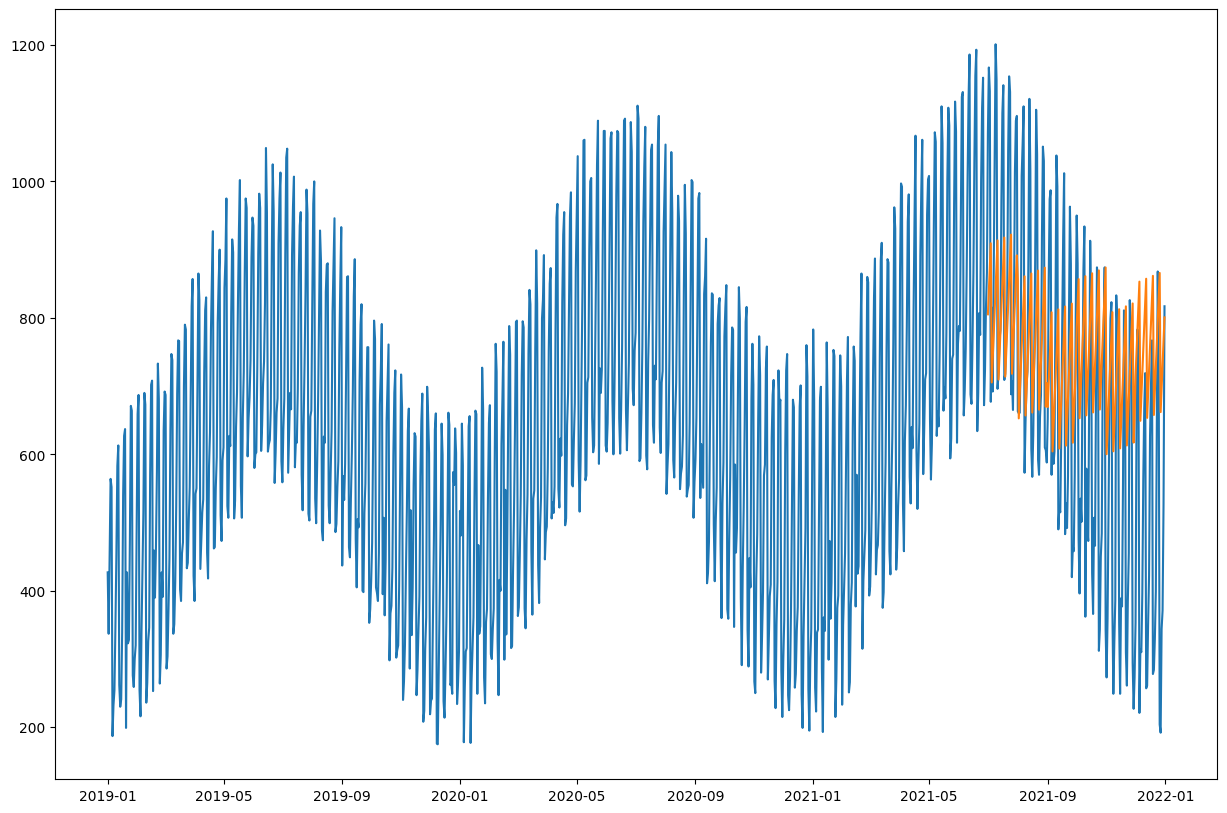

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(time_series.item_count,label='actual')
plt.plot(test.lr_pred,label='LR Pred')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
lr_rmse=mean_squared_error(y_true=test.item_count,y_pred=test.lr_pred)
lr_rmse=float(np.sqrt(lr_rmse))
lr_rmse

244.21084434408763

In [ ]:
lr_mae=mean_absolute_error(y_true=test.item_count,y_pred=test.lr_pred)
lr_mae

196.03716718643884

In [ ]:
lr_r2_score=r2_score(y_true=test.item_count,y_pred=test.lr_pred)
lr_r2_score

0.07649488415362504

In [ ]:
results=pd.DataFrame([lr_rmse,lr_mae,lr_r2_score*100],index=['RMSE','MAE','R2 Score'],columns=['Linear Regression '])
results

Linear Regression 
RMSE              244.210844
MAE               196.037167
R2 Score            7.649488

**R2 score is low only 7 % which means its not a good model**

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(n_estimators=100,max_depth=20)
rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=20)

In [ ]:
test['rf_pred']=rf.predict(x_test)

/tmp/ipython-input-87-1851678826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rf_pred']=rf.predict(x_test)


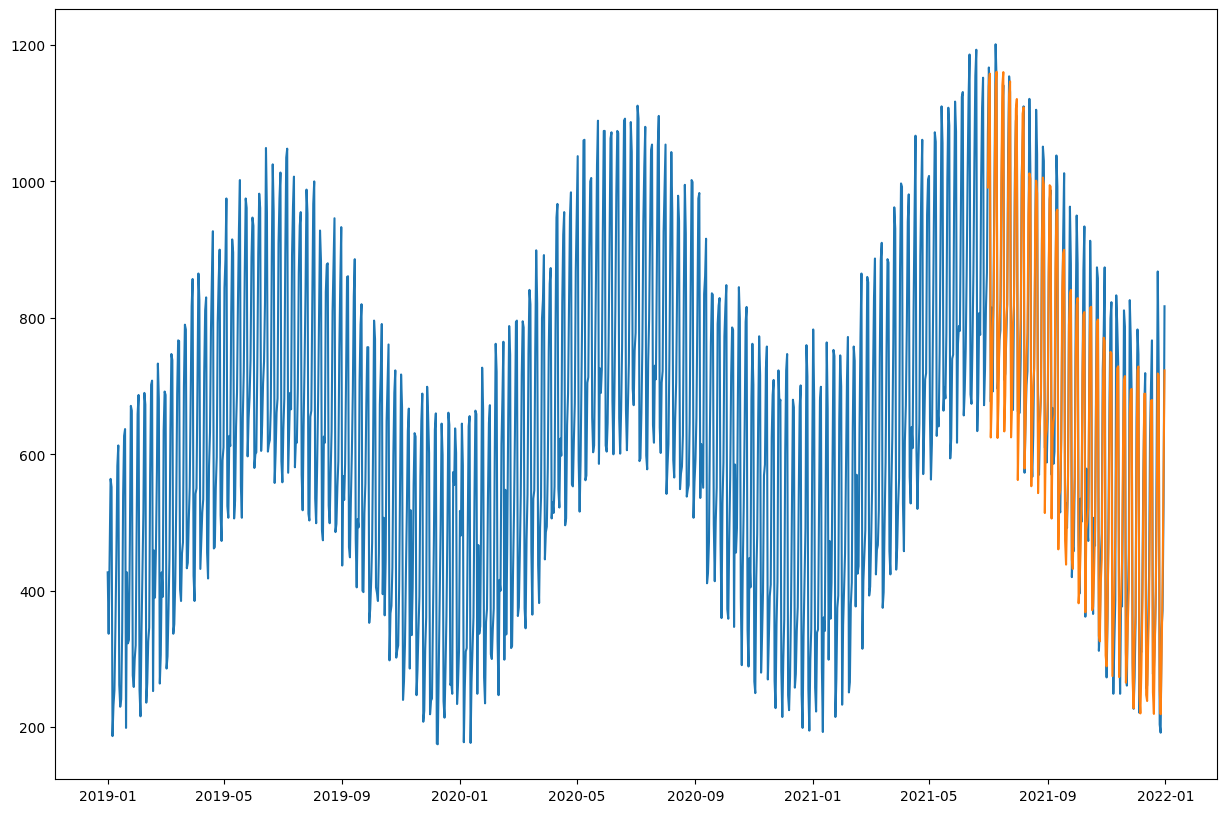

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(time_series.item_count,label='actual')
plt.plot(test.rf_pred,label='RF Pred')

In [ ]:
rf_rmse=mean_squared_error(y_true=test.item_count,y_pred=test.rf_pred)
rf_rmse=float(np.sqrt(rf_rmse))


In [ ]:
rf_mae=mean_absolute_error(y_true=test.item_count,y_pred=test.rf_pred)

In [ ]:
rf_r2_score=r2_score(y_true=test.item_count,y_pred=test.rf_pred)

In [ ]:
results['Random Forest']=[rf_rmse,rf_mae,rf_r2_score*100]
results

Linear Regression   Random Forest
RMSE              244.210844      60.451647
MAE               196.037167      47.880761
R2 Score            7.649488      94.341182

In [ ]:
#XGBOOST
from xgboost import XGBRegressor


In [ ]:
xgb=XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1,random_state=42)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
test['xgb_predict']=xgb.predict(x_test)

/tmp/ipython-input-95-4127904340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb_predict']=xgb.predict(x_test)


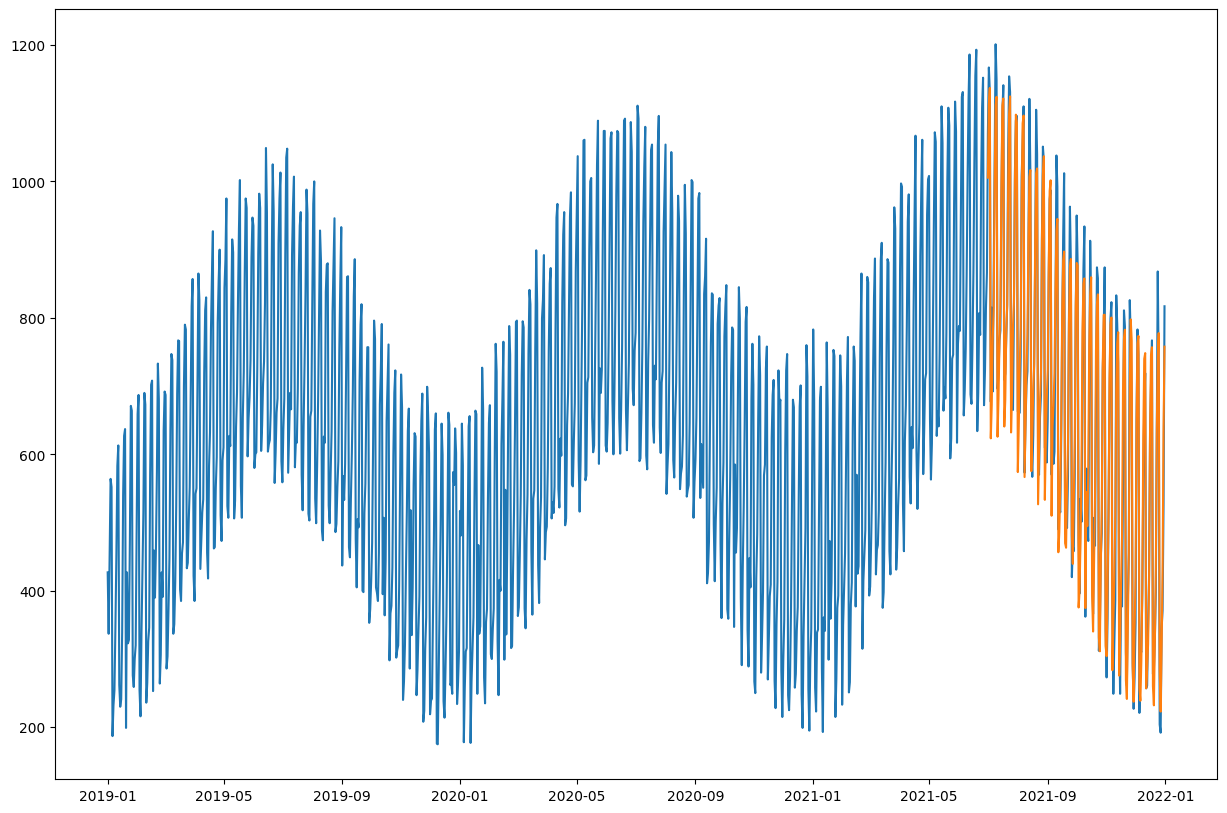

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(time_series.item_count,label='actual')
plt.plot(test.xgb_predict,label='XGB Pred')

In [ ]:
xgb_rmse=mean_squared_error(y_true=test.item_count,y_pred=test.xgb_predict)
xgb_rmse=float(np.sqrt(xgb_rmse))

In [ ]:
xgb_mae=mean_absolute_error(y_true=test.item_count,y_pred=test.xgb_predict)

In [ ]:
xgb_r2_score=r2_score(y_true=test.item_count,y_pred=test.xgb_predict)

In [ ]:
results['XGBoost']=[xgb_rmse,xgb_mae,xgb_r2_score*100]
results

Linear Regression   Random Forest    XGBoost
RMSE              244.210844      60.451647  55.704410
MAE               196.037167      47.880761  44.185568
R2 Score            7.649488      94.341182  95.195053

**XGBOOST is the better model for this use case**

In [ ]:
x_test

weekday  year  month  quarter  day_year  day_month  week_num
date                                                                    
2021-07-01      3.0  2021    6.0        3       182          1        26
2021-07-02      4.0  2021    6.0        3       183          2        26
2021-07-03      5.0  2021    6.0        3       184          3        26
2021-07-04      6.0  2021    6.0        3       185          4        26
2021-07-05      0.0  2021    6.0        3       186          5        27
...             ...   ...    ...      ...       ...        ...       ...
2021-12-27      0.0  2021   11.0        4       361         27        52
2021-12-28      1.0  2021   11.0        4       362         28        52
2021-12-29      2.0  2021   11.0        4       363         29        52
2021-12-30      3.0  2021   11.0        4       364         30        52
2021-12-31      4.0  2021   11.0        4       365         31        52

[184 rows x 7 columns]

**Use the best-performing models to make a forecast for the next year**

In [ ]:
#Create a new dataframe with future dates
future_date=pd.date_range(start='2022-01-01',periods=365,freq='D')
future_df=pd.DataFrame({'date':future_date})
future_df

date
0   2022-01-01
1   2022-01-02
2   2022-01-03
3   2022-01-04
4   2022-01-05
..         ...
360 2022-12-27
361 2022-12-28
362 2022-12-29
363 2022-12-30
364 2022-12-31

[365 rows x 1 columns]

In [ ]:
#create feature columns similiar to the test data
future_df['day_year']=future_df['date'].dt.day_of_year
future_df['day_month']=future_df['date'].dt.day
future_df['week_num']=future_df['date'].dt.isocalendar().week.astype(int)
future_df['weekday']=future_df['date'].dt.weekday
future_df['year']=future_df['date'].dt.year
future_df['month']=future_df['date'].dt.month
future_df['quarter']=future_df['date'].dt.quarter


In [ ]:
future_df

date  day_year  day_month  week_num  weekday  year  month  quarter
0   2022-01-01         1          1        52        5  2022      1        1
1   2022-01-02         2          2        52        6  2022      1        1
2   2022-01-03         3          3         1        0  2022      1        1
3   2022-01-04         4          4         1        1  2022      1        1
4   2022-01-05         5          5         1        2  2022      1        1
..         ...       ...        ...       ...      ...   ...    ...      ...
360 2022-12-27       361         27        52        1  2022     12        4
361 2022-12-28       362         28        52        2  2022     12        4
362 2022-12-29       363         29        52        3  2022     12        4
363 2022-12-30       364         30        52        4  2022     12        4
364 2022-12-31       365         31        52        5  2022     12        4

[365 rows x 8 columns]

In [ ]:
#To make sure your future_df matches your training set (X_train), you can reorder it explicitly
future_df = future_df[x_train.columns]

In [ ]:
future_df

weekday  year  month  quarter  day_year  day_month  week_num
0          5  2022      1        1         1          1        52
1          6  2022      1        1         2          2        52
2          0  2022      1        1         3          3         1
3          1  2022      1        1         4          4         1
4          2  2022      1        1         5          5         1
..       ...   ...    ...      ...       ...        ...       ...
360        1  2022     12        4       361         27        52
361        2  2022     12        4       362         28        52
362        3  2022     12        4       363         29        52
363        4  2022     12        4       364         30        52
364        5  2022     12        4       365         31        52

[365 rows x 7 columns]

In [ ]:
x_train

weekday  year  month  quarter  day_year  day_month  week_num
date                                                                    
2019-01-01      1.0  2019    0.0        1         1          1         1
2019-01-02      2.0  2019    0.0        1         2          2         1
2019-01-03      3.0  2019    0.0        1         3          3         1
2019-01-04      4.0  2019    0.0        1         4          4         1
2019-01-05      5.0  2019    0.0        1         5          5         1
...             ...   ...    ...      ...       ...        ...       ...
2021-06-26      5.0  2021    5.0        2       177         26        25
2021-06-27      6.0  2021    5.0        2       178         27        25
2021-06-28      0.0  2021    5.0        2       179         28        26
2021-06-29      1.0  2021    5.0        2       180         29        26
2021-06-30      2.0  2021    5.0        2       181         30        26

[912 rows x 7 columns]

In [ ]:
future_df.dtypes

weekday      int32
year         int32
month        int32
quarter      int32
day_year     int32
day_month    int32
week_num     int64
dtype: object

In [ ]:
x_train.dtypes

weekday      float64
year           int32
month        float64
quarter        int32
day_year       int32
day_month      int32
week_num       int64
dtype: object

In [ ]:
future_df['weekday']=future_df['weekday'].astype(np.float64)
future_df['month']=future_df['month'].astype(np.float64)

/tmp/ipython-input-110-4240597079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_df['weekday']=future_df['weekday'].astype(np.float64)
/tmp/ipython-input-110-4240597079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_df['month']=future_df['month'].astype(np.float64)


In [ ]:
future_df.dtypes

weekday      float64
year           int32
month        float64
quarter        int32
day_year       int32
day_month      int32
week_num       int64
dtype: object

In [ ]:
future_df['predicted_sales']=xgb.predict(future_df)

In [ ]:
future_df

weekday  year  month  quarter  day_year  day_month  week_num  \
0        5.0  2022    1.0        1         1          1        52   
1        6.0  2022    1.0        1         2          2        52   
2        0.0  2022    1.0        1         3          3         1   
3        1.0  2022    1.0        1         4          4         1   
4        2.0  2022    1.0        1         5          5         1   
..       ...   ...    ...      ...       ...        ...       ...   
360      1.0  2022   12.0        4       361         27        52   
361      2.0  2022   12.0        4       362         28        52   
362      3.0  2022   12.0        4       363         29        52   
363      4.0  2022   12.0        4       364         30        52   
364      5.0  2022   12.0        4       365         31        52   

     predicted_sales  
0         737.929565  
1         294.131470  
2         263.200226  
3         331.119629  
4         361.958984  
..               ...  
360       321.183502  
361       426.610931  
362       638.004272  
363       756.368774  
364       742.412720  

[365 rows x 8 columns]

**Forecasting using deep learning algorithms:**
**a. Use sales amount for predictions instead of item count**

In [ ]:
merged_data

date  item_id  price  item_count  store_id  \
0      2019-01-01        3  29.22         2.0         1   
1      2019-01-01        4  26.42        22.0         1   
2      2019-01-01       12   4.87         7.0         1   
3      2019-01-01       13   4.18        12.0         1   
4      2019-01-01       16   3.21       136.0         1   
...           ...      ...    ...         ...       ...   
109595 2021-12-31       96  21.93         0.0         5   
109596 2021-12-31       97  28.65         0.0         4   
109597 2021-12-31       98   5.00         0.0         2   
109598 2021-12-31       99   5.32         0.0         4   
109599 2021-12-31      100   2.48         0.0         2   

                                                item_name  kcal  \
0                                       Sweet Fruity Cake   931   
1                         Amazing Steak Dinner with Rolls   763   
2                                    Fantastic Sweet Cola   478   
3                                 Sweet Frozen Soft Drink   490   
4                                    Frozen Milky Smoothy   284   
...                                                   ...   ...   
109595                  Blue Ribbon Fish with Bread Lunch   708   
109596  Original Fruity Cod with Bread and Vegetables ...   744   
109597                    Original Sweet Milky Soft Drink   579   
109598                           Frozen Tomato Soft Drink   423   
109599                             Awesome Vodka Cocktail   223   

       restaurant_name  weekday     month  quarter  year quarter_year  \
0          Bob's Diner  Tuesday   January        1  2019      Q1-2019   
1          Bob's Diner  Tuesday   January        1  2019      Q1-2019   
2          Bob's Diner  Tuesday   January        1  2019      Q1-2019   
3          Bob's Diner  Tuesday   January        1  2019      Q1-2019   
4          Bob's Diner  Tuesday   January        1  2019      Q1-2019   
...                ...      ...       ...      ...   ...          ...   
109595     Corner Cafe   Friday  December        4  2021      Q4-2021   
109596        Fou Cher   Friday  December        4  2021      Q4-2021   
109597  Beachfront Bar   Friday  December        4  2021      Q4-2021   
109598        Fou Cher   Friday  December        4  2021      Q4-2021   
109599  Beachfront Bar   Friday  December        4  2021      Q4-2021   

        sales_amt  
0           58.44  
1          581.24  
2           34.09  
3           50.16  
4          436.56  
...           ...  
109595       0.00  
109596       0.00  
109597       0.00  
109598       0.00  
109599       0.00  

[109600 rows x 14 columns]

In [ ]:
daily_sales=merged_data.groupby('date')['sales_amt'].sum().reset_index()

In [ ]:
daily_sales

date  sales_amt
0    2019-01-01    4023.00
1    2019-01-02    3074.69
2    2019-01-03    4062.71
3    2019-01-04    5006.81
4    2019-01-05    4927.53
...         ...        ...
1091 2021-12-27    1867.71
1092 2021-12-28    3426.50
1093 2021-12-29    3715.39
1094 2021-12-30    5266.27
1095 2021-12-31    8287.81

[1096 rows x 2 columns]

In [ ]:
# @title
#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
daily_sales['scaled_sales']=scaler.fit_transform(daily_sales[['sales_amt']])
daily_sales

date  sales_amt  scaled_sales
0    2019-01-01    4023.00      0.246762
1    2019-01-02    3074.69      0.154281
2    2019-01-03    4062.71      0.250635
3    2019-01-04    5006.81      0.342705
4    2019-01-05    4927.53      0.334974
...         ...        ...           ...
1091 2021-12-27    1867.71      0.036574
1092 2021-12-28    3426.50      0.188590
1093 2021-12-29    3715.39      0.216763
1094 2021-12-30    5266.27      0.368008
1095 2021-12-31    8287.81      0.662675

[1096 rows x 3 columns]

In [ ]:
# Define train-test split (e.g., last 3 months = test)
split_date = daily_sales['date'].max() - pd.DateOffset(months=3)
train_series = daily_sales[daily_sales['date'] <= split_date]['scaled_sales'].values
test_series = daily_sales[daily_sales['date'] > split_date]['scaled_sales'].values

In [ ]:
#Generate synthetic data for the last 12 months

dates = pd.date_range(end='2025-01-01', periods=365, freq='D')
synthetic_sales = 100 + 20 * np.sin(2 * np.pi * np.arange(365)/365) + np.random.normal(0, 5, 365)

synthetic_df = pd.DataFrame({'date': dates, 'sales_amount': synthetic_sales})
synthetic_df['scaled_sales'] = scaler.fit_transform(synthetic_df[['sales_amount']])

In [ ]:
#Convert time series to LSTM sequences

def create_sequences(series, seq_length):
    X, y = [], []
    for i in range(len(series) - seq_length):
        X.append(series[i:i+seq_length])
        y.append(series[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Using last 30 days to predict next
X_train, y_train = create_sequences(train_series, seq_length)
X_test, y_test = create_sequences(test_series, seq_length)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#Build and train an LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1208
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0296
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0290
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0276
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0286
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0274
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0249
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0208
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0117
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0113
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0101
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0089
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0094
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0100
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0083
Epoch 16/20
61/

In [ ]:
#Use the model to make predictions for the test data

y_pred = model.predict(X_test)

# Inverse transform to get actual sales amount
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step


In [ ]:
#Calculate the mean absolute percentage error (MAPE) and comment on the model's performance

import numpy as np

mape = np.mean(np.abs((y_test_actual - y_pred_actual) / y_test_actual)) * 100
print(f"✅ MAPE: {mape:.2f}%")

✅ MAPE: 5.91%


Since MAPE is less then 10 , its an EXCELLENT model

In [ ]:
#Develop another model using the entire series for training, and use it to forecast for the next three
#months

full_series = daily_sales['scaled_sales'].values
X_full, y_full = create_sequences(full_series, seq_length)
X_full = X_full.reshape((X_full.shape[0], X_full.shape[1], 1))

model.fit(X_full, y_full, epochs=20, batch_size=16, verbose=1)


Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0069
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0059
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0063
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0056
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0049
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0047
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0041
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0040
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0036
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040
Epoch 13/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0036
Epoch 14/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0032
Epoch 15/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0033
Epoc

In [ ]:
last_seq = full_series[-seq_length:].tolist()
future_preds = []

for _ in range(90):
    input_seq = np.array(last_seq[-seq_length:]).reshape(1, seq_length, 1)
    next_val = model.predict(input_seq)[0][0]
    future_preds.append(next_val)
    last_seq.append(next_val)

# Inverse transform
future_sales = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━

In [ ]:
future_sales

array([[104.28361 ],
       [ 78.07363 ],
       [ 77.97445 ],
       [ 81.72937 ],
       [ 86.98385 ],
       [ 96.97771 ],
       [108.40962 ],
       [108.10619 ],
       [ 79.22224 ],
       [ 79.6734  ],
       [ 85.021545],
       [ 90.40484 ],
       [ 99.86089 ],
       [110.51303 ],
       [110.99731 ],
       [ 81.28283 ],
       [ 81.89252 ],
       [ 86.260895],
       [ 92.073074],
       [102.26493 ],
       [113.0445  ],
       [114.42838 ],
       [ 83.60955 ],
       [ 83.86982 ],
       [ 88.865746],
       [ 94.556694],
       [104.80141 ],
       [115.952835],
       [117.92665 ],
       [ 86.63361 ],
       [ 86.84036 ],
       [ 91.87927 ],
       [ 97.46345 ],
       [107.727425],
       [119.230644],
       [121.041504],
       [ 89.48848 ],
       [ 89.89363 ],
       [ 95.05329 ],
       [100.750984],
       [111.13873 ],
       [122.55857 ],
       [124.15811 ],
       [ 92.91068 ],
       [ 93.29052 ],
       [ 98.43384 ],
       [104.37367 ],
       [114.9

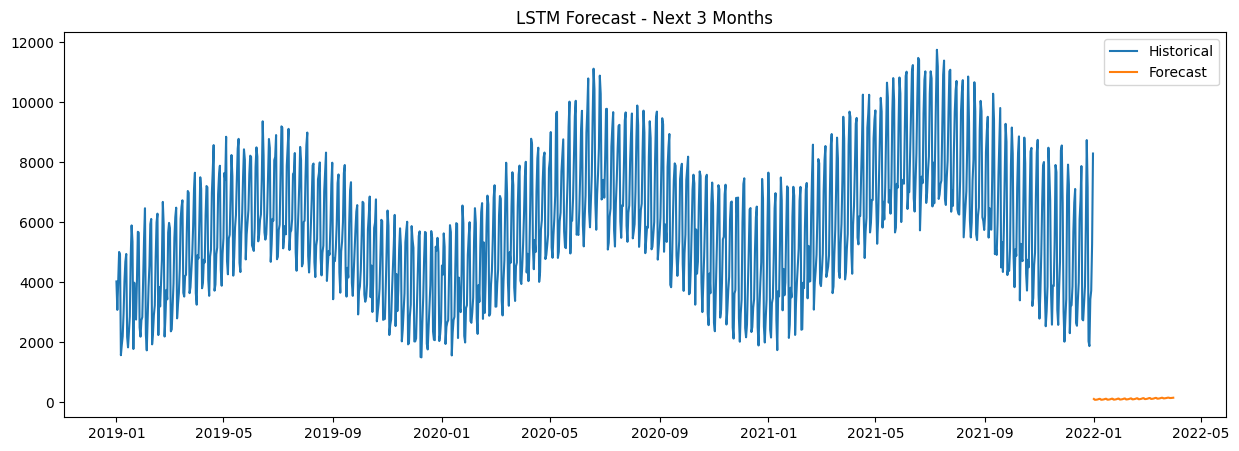

In [ ]:
# @title
plt.figure(figsize=(15, 5))
plt.plot(daily_sales['date'], daily_sales['sales_amt'], label='Historical')
future_dates = pd.date_range(start=daily_sales['date'].max() + pd.Timedelta(days=1), periods=90)
plt.plot(future_dates, future_sales, label='Forecast')
plt.legend()
plt.title('LSTM Forecast - Next 3 Months')
plt.show()